In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Column names from the dataset documentation
columns = [
    "Sample_code_number", "Clump_Thickness", "Uniformity_of_Cell_Size",
    "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size",
    "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"
]

# Load the data
df = pd.read_csv("/Users/bfilart/Downloads/breast-cancer-wisconsin.data", names=columns, na_values="?")

In [2]:
df.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_Thickness              699 non-null    int64  
 2   Uniformity_of_Cell_Size      699 non-null    int64  
 3   Uniformity_of_Cell_Shape     699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [4]:
nulls = df.isnull().sum()
(nulls)

Sample_code_number              0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

/var/folders/5h/s5f_c2zs57309156nrw78v_c0000gn/T/ipykernel_45050/2666906068.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['#4c72b0', '#c44e52'])


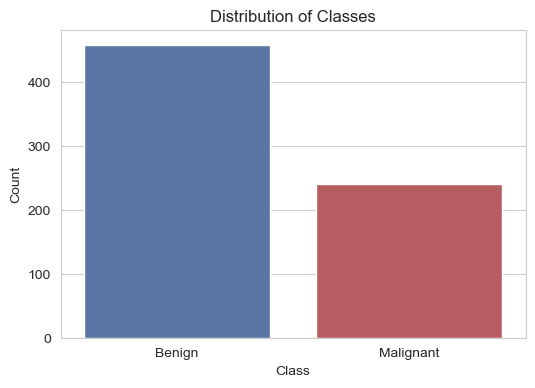

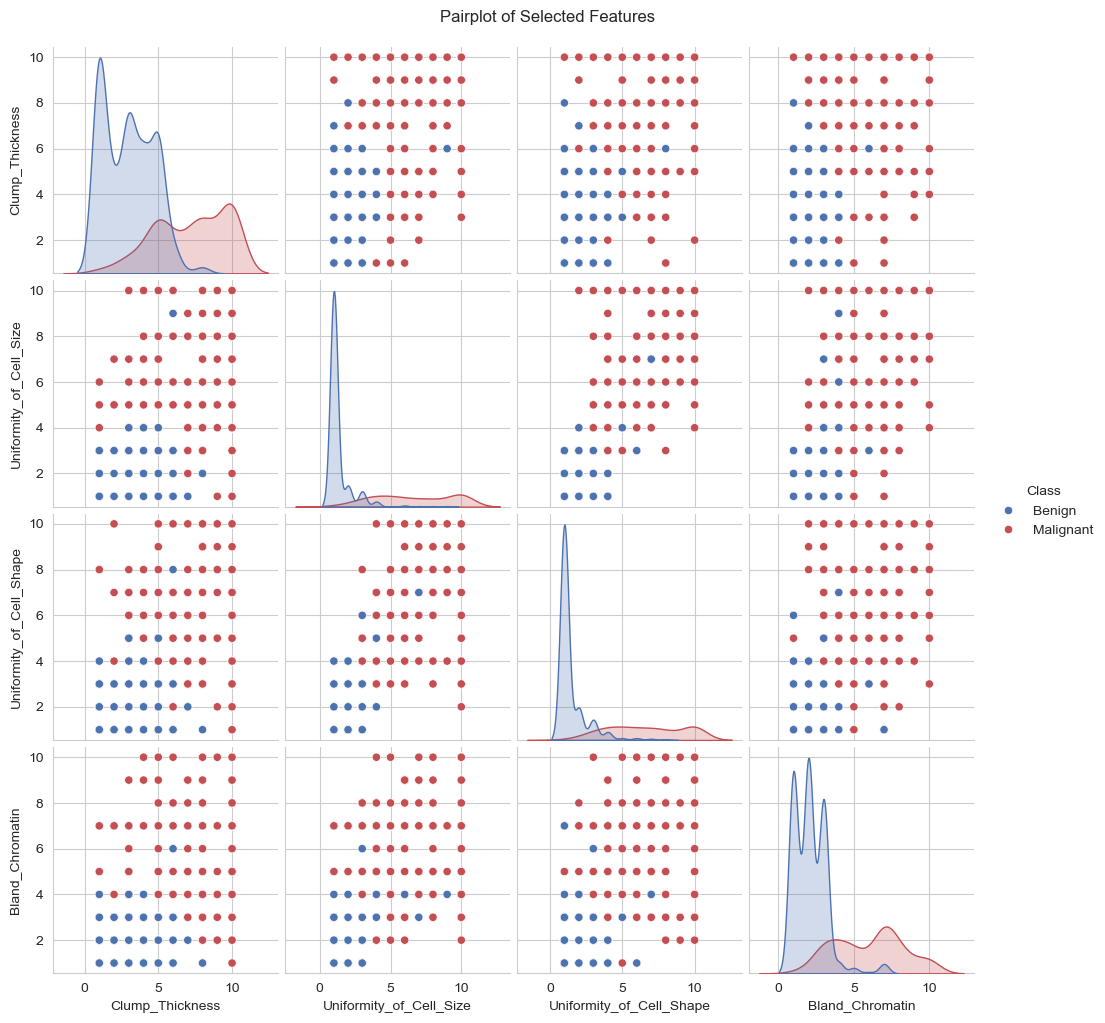

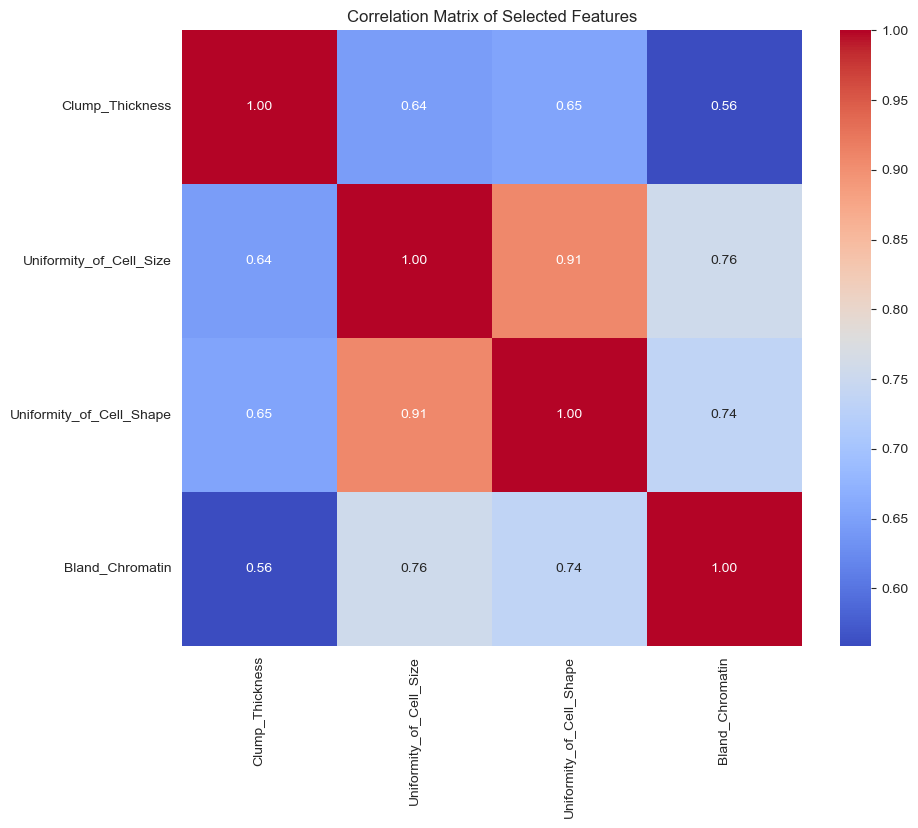

In [5]:
# Convert Class: 2 = Benign, 4 = Malignant
df["Class"] = df["Class"].map({2: "Benign", 4: "Malignant"})

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette=['#4c72b0', '#c44e52'])
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plot a pairplot of selected features colored by class
selected_features = [
    'Clump_Thickness',
    'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape',
    'Bland_Chromatin'
]
sns.pairplot(df[selected_features + ['Class']], hue='Class', palette=['#4c72b0', '#c44e52'])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

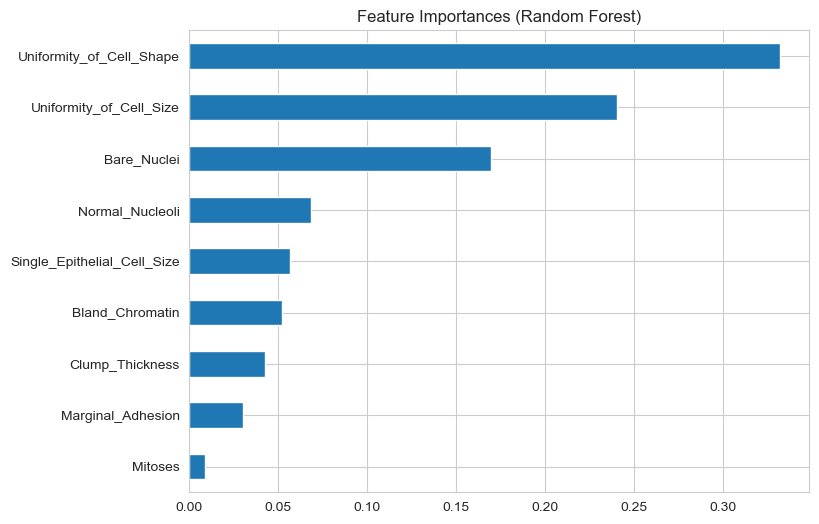

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Drop non-feature columns
X = df.drop(['Sample_code_number', 'Class'], axis=1)
y = df['Class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6), title="Feature Importances (Random Forest)")
plt.show()

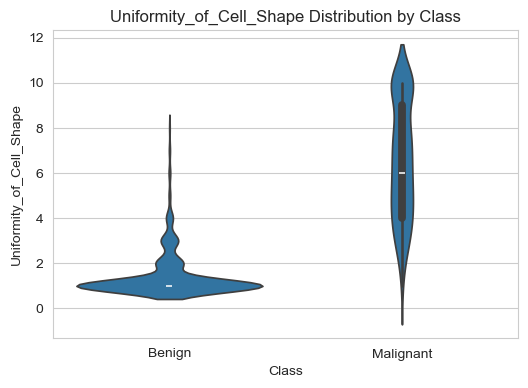

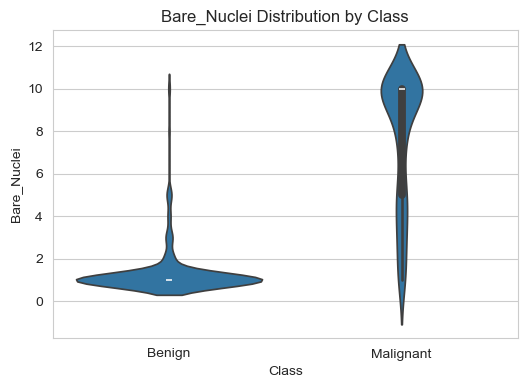

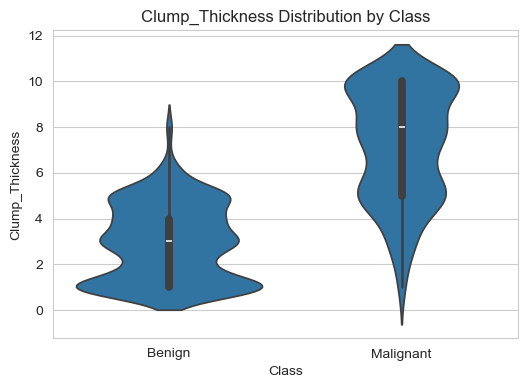

In [7]:
#Violin Plots

features = ['Uniformity_of_Cell_Shape', 'Bare_Nuclei', 'Clump_Thickness']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} Distribution by Class')
    plt.show()

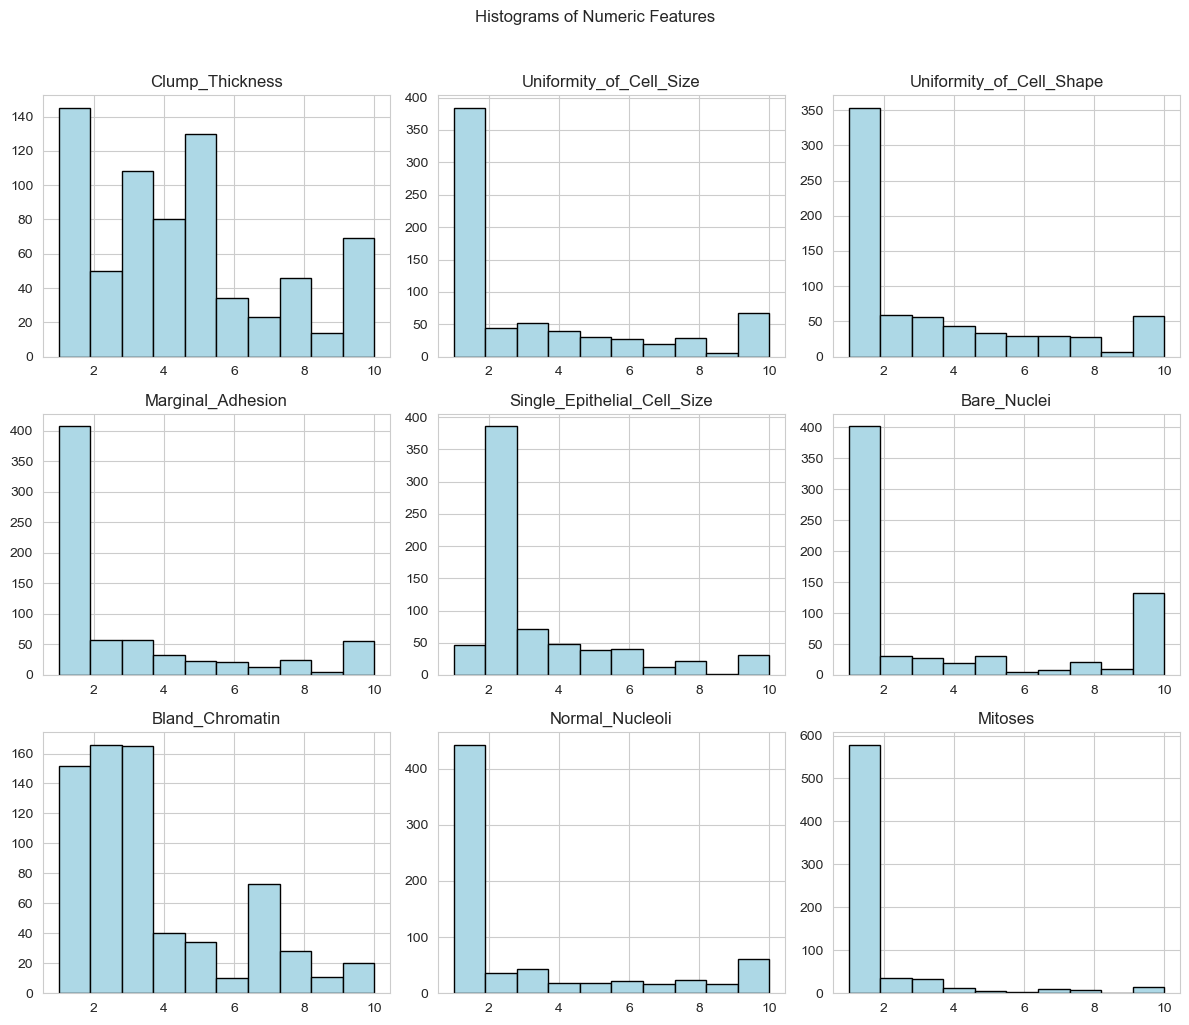

In [8]:
df.drop(['Sample_code_number', 'Class'], axis=1).hist(bins=10, figsize=(12, 10), color='lightblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

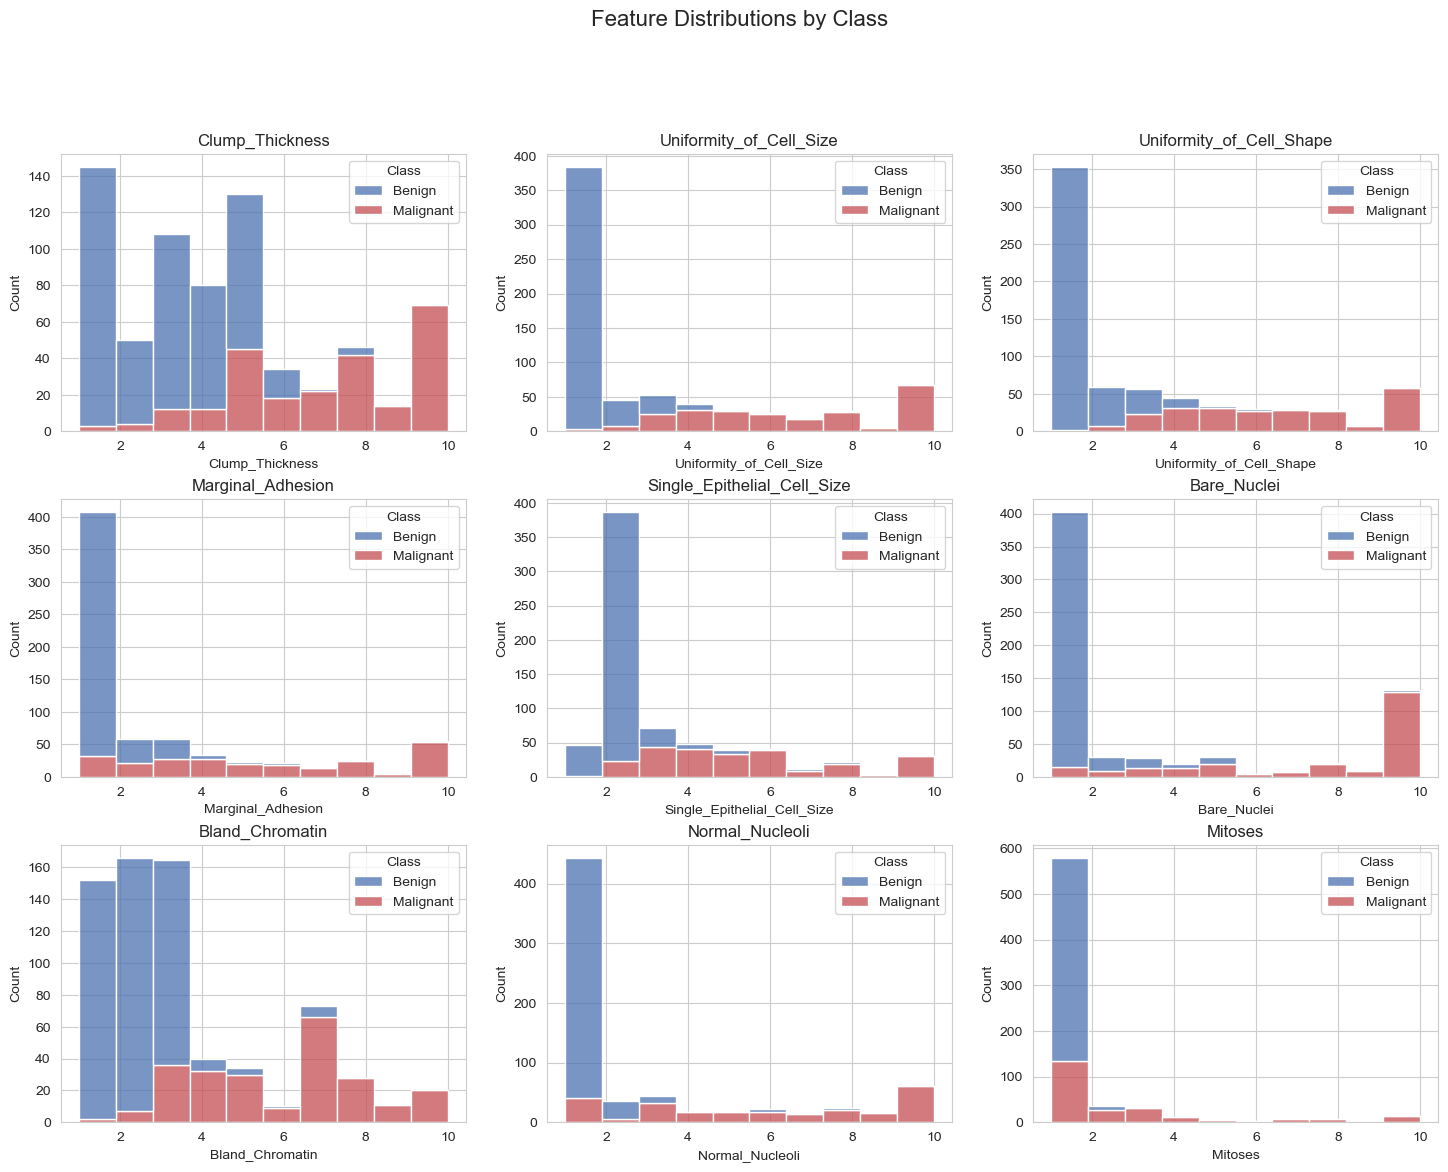

In [10]:
features2 = ["Clump_Thickness", "Uniformity_of_Cell_Size",
    "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size",
    "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses"]

# Define class-specific color palette
custom_palette = {"Benign": "#4c72b0", "Malignant": "#c44e52"}  # blue & red

# Set up subplot grid (3 rows x 3 cols)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Feature Distributions by Class", fontsize=16)
plt.tight_layout(pad=3.0, rect=[0, 0, 1, 0.95])

# Plot each feature with consistent colors
for i, feature in enumerate(features2):
    row, col = divmod(i, 3)
    sns.histplot(
        data=df,
        x=feature,
        hue='Class',
        multiple='stack',
        bins=10,
        ax=axes[row][col],
        palette=custom_palette
    )
    axes[row][col].set_title(f'{feature}')
plt.show()